In [2]:
!fusermount -u drive
!google-drive-ocamlfuse drive
from google.colab import drive
drive.mount('/content/drive')

/bin/bash: google-drive-ocamlfuse: command not found
Mounted at /content/drive


In [3]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.3MB/s 
     |████████████████████████████████| 194kB 44.2MB/s 
     |████████████████████████████████| 1.2MB 51.3MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
Mounted at /content/gdrive


In [4]:
#hide
import requests
from fastbook import *
from fastai.vision.widgets import *

In [5]:
painters = 'Christian Gottlieb Kratzenstein Stub', 'Nicolai Abildgaard', 'Constantin Hansen', 'Wilhelm Marstrand', 'Martinus Rørbye', 'Christen Købke'
path = Path('/content/gdrive/MyDrive/Colab Notebooks/Painters')

In [6]:
fns = get_image_files(path)
fns

(#1678) [Path('/content/gdrive/MyDrive/Colab Notebooks/Painters/Christen Købke/ae600624-c562-4532-862a-75adb8fd0eab.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/Painters/Christen Købke/2fb91ea8-4734-4488-8877-bdbd135ac37d.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/Painters/Christen Købke/43eca139-2753-4ded-a848-b0630ec500db.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/Painters/Christen Købke/ab1c6cae-542c-4e00-8354-9ab183125aaa.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/Painters/Christen Købke/679dfb16-d0ea-4244-861c-69ef254c0f71.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/Painters/Christen Købke/5ec51939-d81c-4df0-881d-1ec500c95931.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/Painters/Christen Købke/d15de42b-03fd-48ab-b28a-a42286e8d1fb.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/Painters/Christen Købke/7df9dca9-7aa7-4eec-813e-26e7106c559a.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/Painters/Christen Købke/e0ce6cec-0abe-41e

In [7]:
#failed = verify_images(fns)
#failed

In [8]:
#failed.map(Path.unlink);

In [9]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [10]:
painters = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
blocks=(ImageBlock, CategoryBlock)

In [12]:
get_items=get_image_files

In [13]:
splitter=RandomSplitter(valid_pct=0.2, seed=42)

In [14]:
get_y=parent_label

In [15]:
item_tfms=Resize(128)

In [16]:
painters

In [17]:
dls = painters.dataloaders(path)

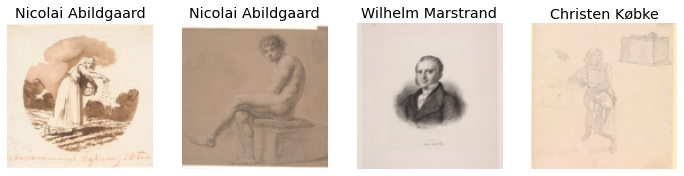

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

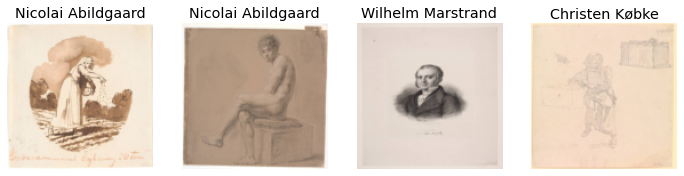

In [21]:
painters = painters.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = painters.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

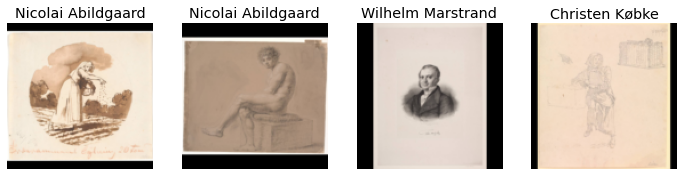

In [22]:
painters = painters.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = painters.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

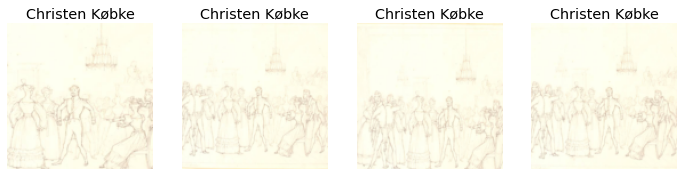

In [23]:
painters = painters.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = painters.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

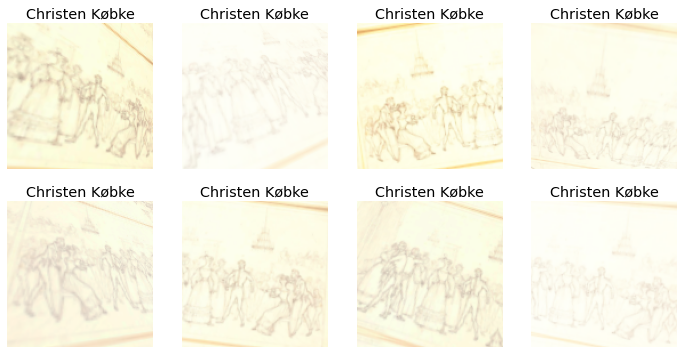

In [24]:
painters = painters.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = painters.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [25]:
painters = painters.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = painters.dataloaders(path)

In [26]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.218834,1.088164,0.361194,04:25


epoch,train_loss,valid_loss,error_rate,time
0,1.195791,0.776505,0.298507,00:34
1,0.960354,0.674077,0.238806,00:33
2,0.827047,0.541351,0.191045,00:33
3,0.709541,0.505943,0.179104,00:33


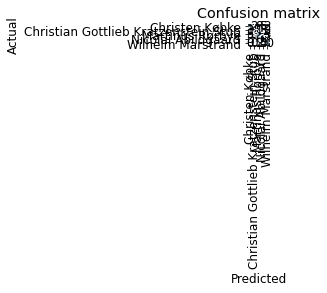

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

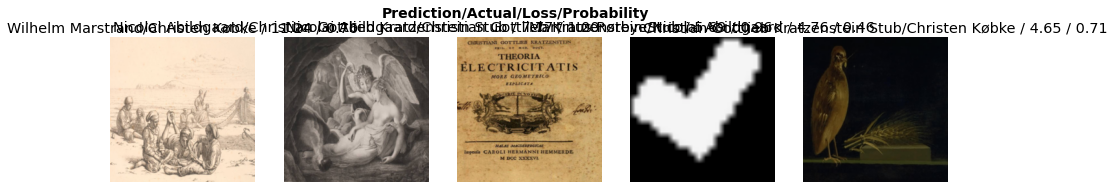

In [28]:
interp.plot_top_losses(5, nrows=1)

In [29]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [30]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [31]:
img = PILImage.create(btn_upload.data[-1])
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

IndexError: ignored

In [ ]:
pred,pred_idx,probs = learn.predict(img)
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred